## Stock Market

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [3]:
data_df=pd.read_csv('data1.csv' ,index_col=0)
list_of_stocks =  list(data_df['symbol'].unique())
print(list_of_stocks)
data_df.head(5)

['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL', 'GOOG', 'BRK-B', 'TSLA', 'NVDA', 'JPM']


,symbol,date,price
0,AAPL,2022-01-31,173.771454
1,AAPL,2022-02-01,173.602463
2,AAPL,2022-02-02,174.825363
3,AAPL,2022-02-03,171.902313
4,AAPL,2022-02-04,171.613632


In [4]:
def fit_neural(data_stock_df, params=None):
    m = NeuralProphet(
    growth="linear",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=10 ,
    num_hidden_layers=4,
    d_hidden=8,
    learning_rate=0.01,
    n_changepoints=15,
    changepoints_range=0.90,
    trend_reg=1,
    batch_size=128,
    epochs=200,
    )

    df = data_stock_df.copy(deep=True)
    df["I"] = np.append(0, data_stock_df["y"].values[1:] - data_stock_df["y"].values[:-1])
    df_train = df[(df['ds']<='2022-09-30')]
    df_test = df[(df['ds']>'2022-09-30')]

    m = m.add_lagged_regressor("I", normalize="standardize")
    metrics = m.fit(df_train, freq="D", validation_df=df_test, progress="plot")
    print(metrics.tail(1))
    fig = m.plot_parameters()
    m = m.highlight_nth_step_ahead_of_each_forecast(1)
    forecast = m.predict(df_test)
    fig = m.plot(forecast)
    return metrics.tail(1).copy()

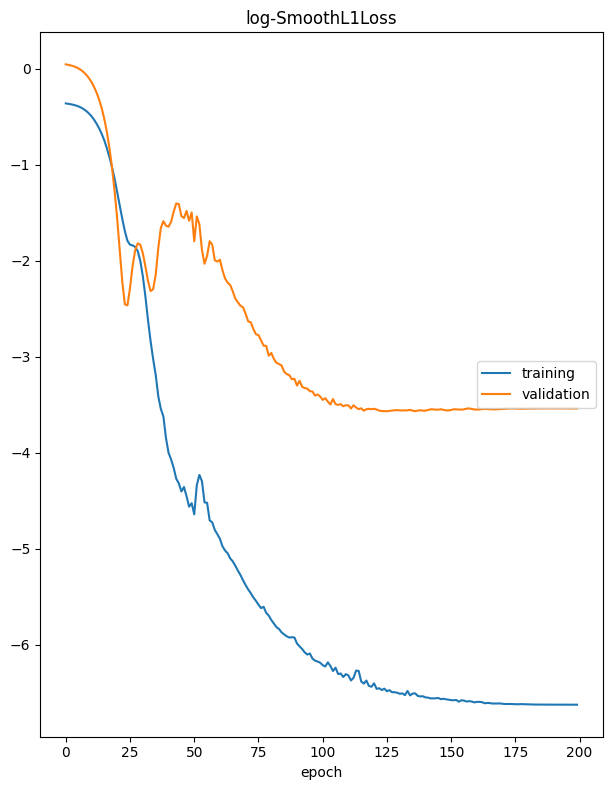

log-SmoothL1Loss
	training         	 (min:   -6.625, max:   -0.361, cur:   -6.625)
	validation       	 (min:   -3.568, max:    0.046, cur:   -3.540)
     SmoothL1Loss       MAE      RMSE      Loss   RegLoss  SmoothL1Loss_val  \
199      0.001326  1.768199  2.303373  0.003605  0.002637          0.029025   

      MAE_val   RMSE_val  
199  8.740454  10.866824  


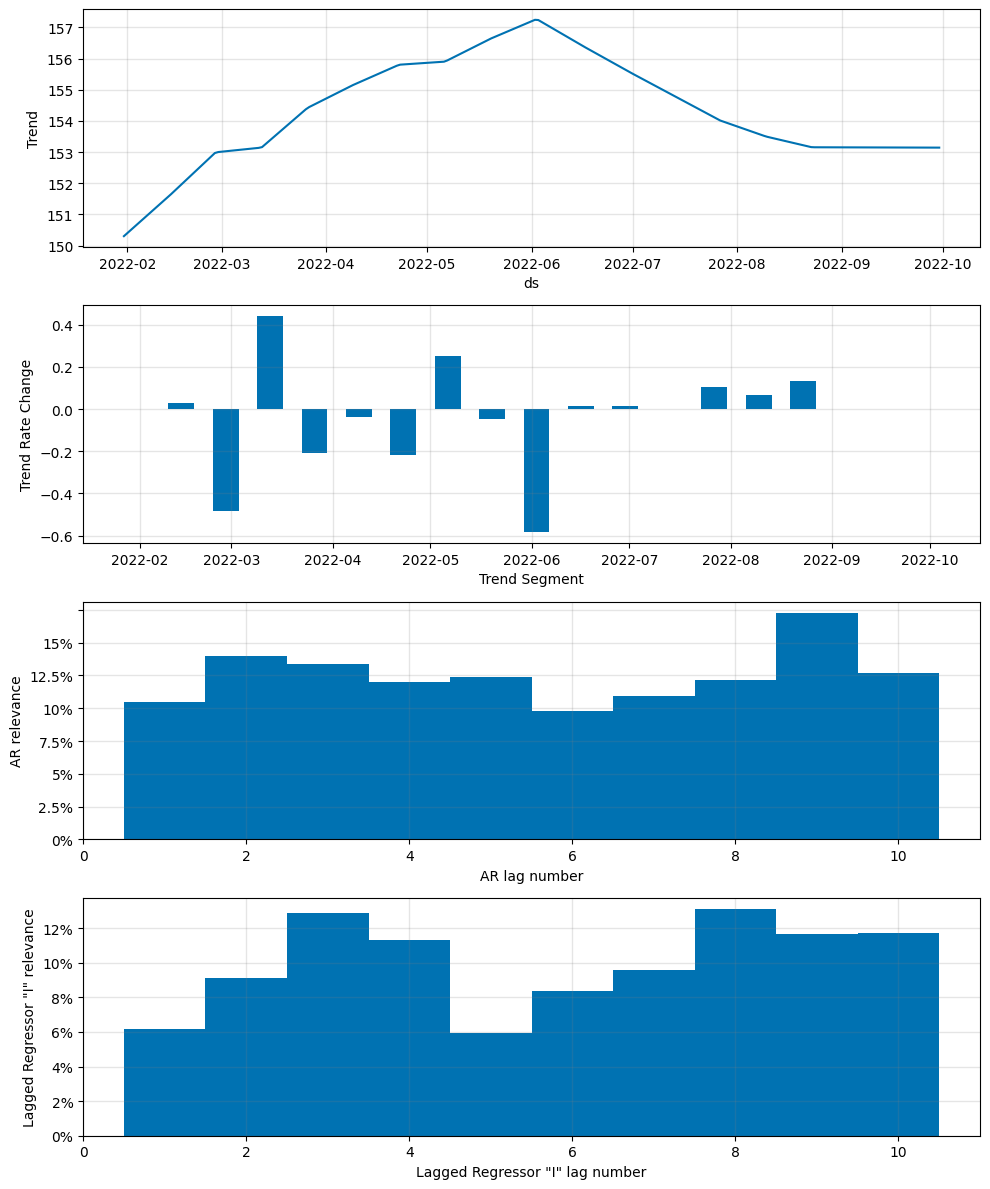

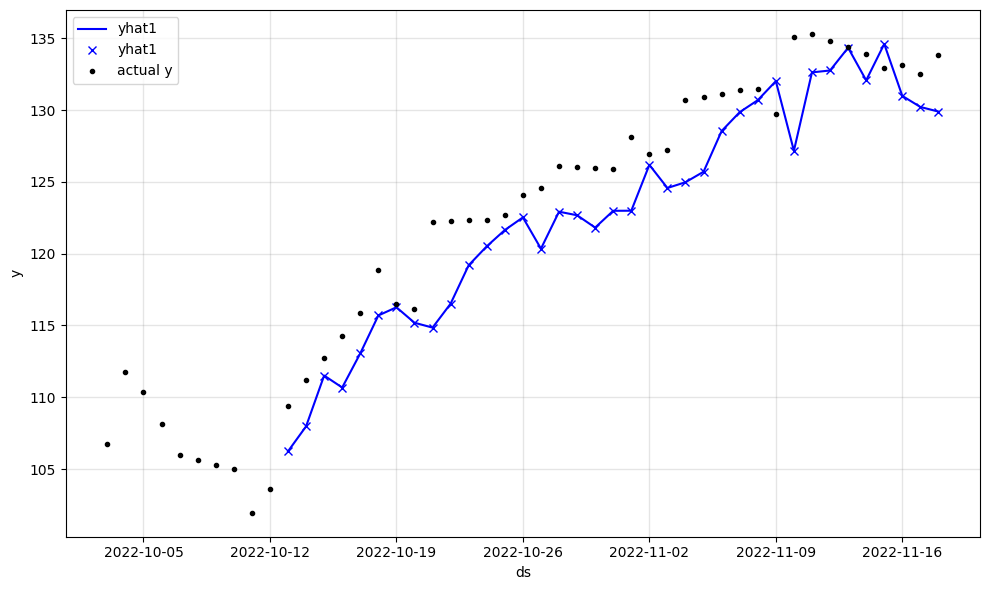

In [6]:
list_of_dataframes = []
for i in list_of_stocks:
    
    data_stock_df = data_df[(data_df['symbol']==i)]
    data_stock_df = data_stock_df.rename(columns={'date':'ds', 'price':'y'})
    data_stock_df = data_stock_df[['ds','y']]
    
    df_metric = fit_neural(data_stock_df) 
    df_metric.insert(0, 'Stock', i)
    list_of_dataframes.append(df_metric)

In [9]:
results_df = pd.concat(list_of_dataframes).reset_index(drop=True)
results_df

,Stock,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,AAPL,0.007262,3.970001,5.324026,0.009177,0.004591,0.230633,27.807846,30.181252
1,MSFT,0.002313,3.790609,5.020392,0.004715,0.002974,0.046862,19.126764,22.598129
2,AMZN,0.001468,2.515702,3.303184,0.003162,0.002136,0.028263,12.003901,14.558647
3,META,0.001055,3.308026,4.299519,0.003498,0.002753,0.138979,43.660469,49.380692
4,GOOGL,0.003315,2.866382,3.733658,0.006167,0.003795,0.030713,9.091045,11.368791
5,GOOG,0.001511,1.984720,2.490340,0.003985,0.002874,0.011504,5.402847,6.881151
6,BRK-B,0.001771,4.017253,5.196304,0.005134,0.003825,0.020154,14.102140,17.540167
7,TSLA,0.005555,10.860864,14.329024,0.006620,0.002744,0.059722,37.537842,47.070496
8,NVDA,0.002882,8.925839,11.048566,0.005407,0.003294,0.011828,18.023502,22.385241
9,JPM,0.001326,1.768199,2.303373,0.003605,0.002637,0.029025,8.740454,10.866824
